## IRIS Task

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
setosaTrainingVec = []
versicolorTrainingVec = []
virginicaTrainingVec = []

setosaTestVec = []
versicolorTestVec = []
virginicaTestVec = []

TrainingSize = 30
TestSize = 20

with open('iris_data/class_1', 'r') as file:
    for line in file:
        if len(setosaTestVec) < TestSize:
            setosaTestVec.append([float(x) for x in line.split(',')])
        else:
            setosaTrainingVec.append([float(x) for x in line.split(',')])

with open('iris_data/class_2', 'r') as file:
    for line in file:
        if len(versicolorTestVec) < TestSize:
            versicolorTestVec.append([float(x) for x in line.split(',')])
        else:
            versicolorTrainingVec.append([float(x) for x in line.split(',')])

with open('iris_data/class_3', 'r') as file:
    for line in file:
        if len(virginicaTestVec) < TestSize:
            virginicaTestVec.append([float(x) for x in line.split(',')])
        else:
            virginicaTrainingVec.append([float(x) for x in line.split(',')])

In [18]:
#In order to properly implement w0 we need to extend the example data with 1(vector)
ones_vector_training = np.ones((TrainingSize, 1))
ones_vector_test = np.ones((TestSize, 1))

setosaTrainingVec = np.array(setosaTrainingVec)
versicolorTrainingVec = np.array(versicolorTrainingVec)
virginicaTrainingVec = np.array(virginicaTrainingVec)

# adding ones to training set
setosaTrainingVec = np.concatenate((setosaTrainingVec, ones_vector_training), axis=1)
versicolorTrainingVec = np.concatenate((versicolorTrainingVec, ones_vector_training), axis=1)
virginicaTrainingVec = np.concatenate((virginicaTrainingVec, ones_vector_training), axis=1)

setosaTestVec = np.array(setosaTestVec)
versicolorTestVec = np.array(versicolorTestVec)
virginicaTestVec = np.array(virginicaTestVec)

# adding ones to test set
setosaTestVec = np.concatenate((setosaTestVec, ones_vector_test), axis=1)
versicolorTestVec = np.concatenate((versicolorTestVec, ones_vector_test), axis=1)
virginicaTestVec = np.concatenate((virginicaTestVec, ones_vector_test), axis=1)

X = np.concatenate((setosaTrainingVec, versicolorTrainingVec, virginicaTrainingVec), axis=0)
X_test = np.concatenate((setosaTestVec, versicolorTestVec, virginicaTestVec), axis=0)

In [19]:
np.random.seed(42)

x = np.append(np.array([np.random.randint(-2,2) for i in range(4)]), 1)
W = np.random.uniform(-1, 1, (3,5)) # W is 3x4 and w0 is 3x1, together we get [W w0] -> W
T = np.concatenate((np.tile([1,0,0], (TrainingSize,1)), np.tile([0,1,0], (TrainingSize,1)), np.tile([0,0,1], (TrainingSize,1))))

def g(x, W): # Eq 20 on vector form classification compendium
    zk = np.matmul(W, x)
    gk = 1 / (1 + np.exp(-zk))
    return gk

print(g(x, W))

[0.66583558 0.57682654 0.57587511]


In [20]:
def MSE(X, T, W): # Eq 19 in classification compendium
    
    mseSum = 0
    for i in range(np.size(X, 0)):
        xk = X[i,:]
        tk = T[i,:]
        gk = g(xk, W)
        
        mseSum += (1/2)* np.linalg.norm((gk - tk), ord=2)
    
    return mseSum

def gradMSE(X, T, W): # Eq 22
    
    gradMSESum = np.zeros((3,5))
    
    for i in range(np.size(X, 0)):
        xk = X[i,:]
        tk = T[i,:]
        gk = g(xk, W)
        
        a = np.multiply((gk - tk), gk)
        b = np.multiply(a, np.ones(3).T - gk)

        gradMSESum += np.outer(b, xk)

    return gradMSESum

print(MSE(X, T, W))
print(gradMSE(X, T, W))

41.47295942893251
[[-1.90566333 -2.74753843  2.35265299  1.14821919 -0.63198007]
 [ 0.79485984  0.48092584  0.37582546  0.11095739  0.14980875]
 [ 8.7723641   7.85397124 -2.55566213 -2.09546052  2.26917951]]


## Linesearch

Step lenght determined by algorithm 3.1 in Numerical Optimization by N&W, Method of training is steepest descent

In [21]:
# Backtracking linesearch algorithm 3.1

alpha0 = 1
rho = 0.95
c = 10e-3

def backtrackingLineSearch(rho, c, Wk, pk):
    alpha = alpha0
    while MSE(X, T, (Wk + alpha*pk)) > MSE(X, T, Wk) + c * alpha * np.linalg.norm(np.matmul(pk.T, pk), ord='fro'):
        alpha = alpha * rho
    
    return alpha
    

In [22]:
tolerance = 1e-4
alpha = 0.0175

np.random.seed(10)
W = np.random.uniform(-1, 1, (3,5))

# Condition on grad W
# while np.linalg.norm(gradMSE(X, T, W), ord='fro') > tolerance:
#     W = W - alpha * gradMSE(X, T, W)
#     print(f"Norm: {np.linalg.norm(gradMSE(X, T, W), ord='fro')}, MSE: {MSE(X, T, W)}")
    

# Condition on change in W
# W_old = W + 10*np.ones((3,5))
# while np.linalg.norm(W-W_old, ord='fro') > tolerance:
#     print(f"Change in W: {np.linalg.norm(W-W_old, ord='fro')}, MSE: {MSE(X, T, W)}")
#     W_old = W
#     W = W - alpha * gradMSE(X, T, W)

W_old = W + 10*np.ones((3,5))
# Condition on MSE
while MSE(X, T, W) > 14.3:
    
    gradW = gradMSE(X,T,W)
    print(f"Change in W: {np.linalg.norm(W-W_old, ord='fro')}, MSE: {MSE(X, T, W)}")
    W_old = W
    W = W - alpha * gradW


Change in W: 38.72983346207417, MSE: 55.25779055290973
Change in W: 0.26755557027583576, MSE: 54.02324841120703
Change in W: 0.6210573549547292, MSE: 45.94462969327192
Change in W: 0.2006865854886235, MSE: 45.37091963618449
Change in W: 0.3253809342615027, MSE: 43.07006433180606
Change in W: 0.2475074941612573, MSE: 41.438843899641405
Change in W: 0.3609328738030979, MSE: 41.466557540381416
Change in W: 0.7983921149210867, MSE: 39.681607044747814
Change in W: 0.6022626808883996, MSE: 42.298655335793875
Change in W: 0.32947168291232665, MSE: 37.027906361579866
Change in W: 0.5737288378310225, MSE: 33.27759268363254
Change in W: 1.192706388905091, MSE: 38.753168699010274
Change in W: 0.9586315440266532, MSE: 38.75554646105227
Change in W: 0.5657558367451857, MSE: 44.170616813970156
Change in W: 0.14024149879572737, MSE: 43.295638682986144
Change in W: 0.27890047498698134, MSE: 39.74728609487118
Change in W: 0.16907563619055133, MSE: 40.800759993482764
Change in W: 0.3560363904158005, MSE

# Verification of model

[[20.  0.  0.]
 [ 0. 19.  1.]
 [ 0.  0. 20.]]


Text(0.5, 1.0, '30 last training / 20 first test')

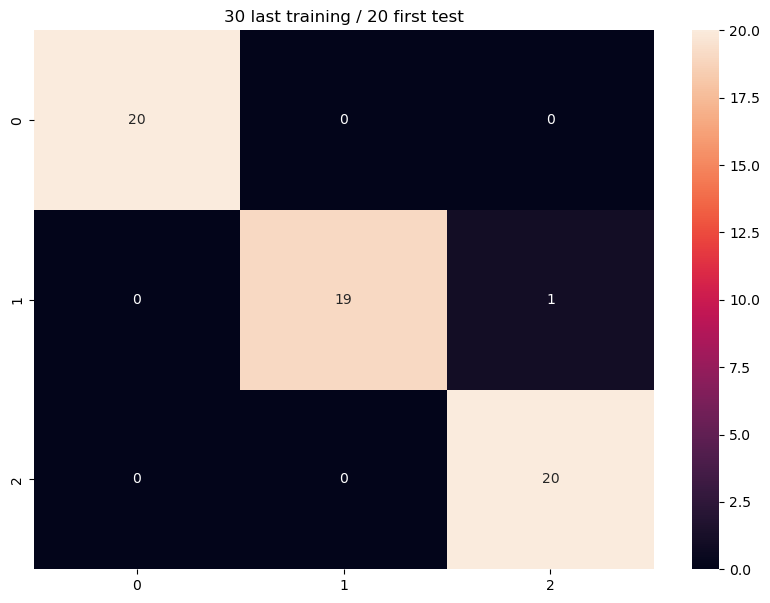

In [26]:
import seaborn as sn

T_test = np.concatenate((np.tile([1,0,0], (TestSize,1)), np.tile([0,1,0], (TestSize,1)), np.tile([0,0,1], (TestSize,1))))

# x-axis: true class
# y-axis: predicted class
confMatrix = np.zeros((3,3))

for i in range(np.size(X_test, 0)):
    x = X_test[i, :]
    t = T_test[i, :]
    
    true_class = np.argmax(t)
    predicted_class = np.argmax(g(x, W))
    #print(true_class, np.argmax(g(x, W)))
    confMatrix[true_class][predicted_class] += 1

print(confMatrix)

plt.figure(figsize = (10,7))
sn.heatmap(confMatrix, annot=True).set_title('30 last training / 20 first test')
